<a href="https://colab.research.google.com/github/bingiflash/NLP_project_uml_2019/blob/master/NLP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json
from collections import Counter,defaultdict
import numpy as np
import matplotlib.pyplot as plt
from nltk import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
import pandas as pd

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
p = pd.read_json('https://raw.githubusercontent.com/bingiflash/NLP_project_uml_2019/master/Headline_Trainingdata.json')
p

,company,id,sentiment,title
0,Morrisons,2,0.430,Morrisons book second consecutive quarter of s...
1,IMI,3,-0.344,IMI posts drop in first-quarter organic revenu...
2,Glencore,4,0.340,Glencore to refinance its short-term debt earl...
3,Ryanair,5,0.259,EasyJet attracts more passengers in June but s...
4,Barclays,6,-0.231,Barclays 'bad bank' chief to step down
5,BP,7,0.113,Bilfinger Industrial Services win Â£100m BP co...
6,Bilfinger Industrial Services,8,0.424,Bilfinger Industrial Services win Â£100m BP co...
7,Barclays,9,-0.373,Barclays share price subdued as bank faces fre...
8,Centrica PLC,10,0.111,Centrica prepared for takeover approach - chai...
9,Glencore,11,-0.231,Jim Armitage: Spare no tears as Glencore's bos...


In [3]:
# Read json dataset
with open('https://raw.githubusercontent.com/bingiflash/NLP_project_uml_2019/master/Headline_Trainingdata.json',encoding='utf-8') as f:
    data = json.loads(f.read())

FileNotFoundError: ignored

In [0]:
data[1141]

{'company': 'Standard Chartered PLC',
 'id': 1143,
 'sentiment': -0.461,
 'title': 'Standard Chartered Shifts Emerging-Markets Strategy After Losses'}

In [0]:
# Get 'title' and 'output' of data
title_data = [x['title'] for x in data]
sentiment_data = [x['sentiment'] for x in data]

In [0]:
# Create vocabulary ( we may want to use vocabulary class we use in our homeworks )
voc = set()
for line in title_data:
  for word in word_tokenize(line):
    voc.add(word)

oh_title_data = []

for line in title_data:
  words = word_tokenize(line)
  temp_list = []
  for word in voc:
    if word in words:
      temp_list.append(1)
    else:
      temp_list.append(0)
  oh_title_data.append(temp_list)

In [0]:
# Split data into train and test - we still have text here, no numeric embeddings or representations
X_train, X_test, y_train, y_test = train_test_split(oh_title_data,sentiment_data, test_size = 0.2, random_state = 5)

In [0]:
# What is this cell actually for?
names =["<-0.9","<-0.6","<-0.3","<0.0","<0.3","<0.6","<0.9","<1.0"]
counter_train=defaultdict(int)
counter_test = defaultdict(int)
for i in y_train:
  if i <=-0.9:
    counter_train["<-0.9"] += 1
  elif i <= -0.6:
    counter_train["<-0.6"] += 1
  elif i <= -0.3:
    counter_train["<-0.3"] += 1
  elif i <= 0.0:
    counter_train["<0.0"] += 1
  elif i <= 0.3:
    counter_train["<0.3"] += 1
  elif i <= 0.6:
    counter_train["<0.6"] += 1
  elif i <= 0.9:
    counter_train["<0.9"] += 1
  elif i <= 1.0:
    counter_train["<1.0"] += 1

for i in y_test:
  if i <=-0.9:
    counter_test["<-0.9"] += 1
  elif i <= -0.6:
    counter_test["<-0.6"] += 1
  elif i <= -0.3:
    counter_test["<-0.3"] += 1
  elif i <= 0.0:
    counter_test["<0.0"] += 1
  elif i <= 0.3:
    counter_test["<0.3"] += 1
  elif i <= 0.6:
    counter_test["<0.6"] += 1
  elif i <= 0.9:
    counter_test["<0.9"] += 1
  elif i <= 1.0:
    counter_test["<1.0"] += 1


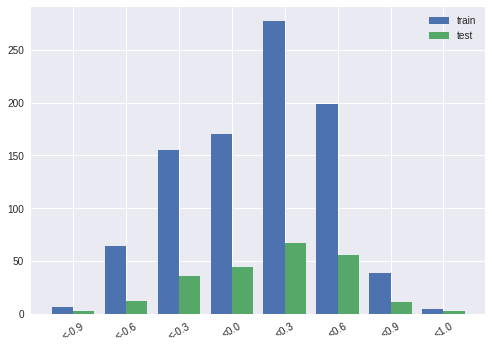

In [0]:
# Visualize the dataset
index = np.arange(len(names))
values_train = [counter_train[c] for c in names]
values_test = [counter_test[c] for c in names]
fig, ax = plt.subplots(figsize=(7,5))
ax.bar(index-0.2,values_train, label="train", width=0.4)
ax.bar(index+0.2,values_test, label="test", width=0.4)
ax.set_xticks(index)
ax.set_xticklabels(names,rotation=30)
ax.legend()
fig.tight_layout()

In [0]:
model_svr = SVR(gamma='auto')
model_svr.fit(X_train,y_train)
y_svr_pred = model_svr.predict(X_test)
print("Mean Absolute Error:",mean_absolute_error(y_test,y_svr_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_svr_pred))
print("Mean Standard deviation",np.sqrt(mean_absolute_error(y_test,y_svr_pred)))

Mean Absolute Error: 0.3220241898217433
Mean Squared Error: 0.15235062123549167
Mean Standard deviation 0.5674717524438933


In [0]:
model_linear = LinearRegression()
model_linear.fit(X_train,y_train)
y_linear_pred = model_linear.predict(X_test)
mean_absolute_error(y_test,y_linear_pred)

3126531307717.0938

In [0]:
y_linear_pred[0]

-3975275771907.9346

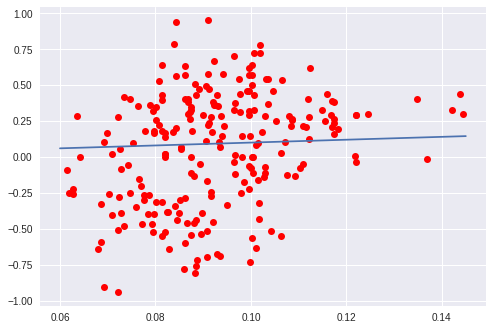

In [0]:
x= np.arange(0.06,0.15,0.005)
plt.plot(y_svr_pred,np.array(y_test),'ro')
plt.plot(x,x)

Text(0.5, 1.0, 'Real data')

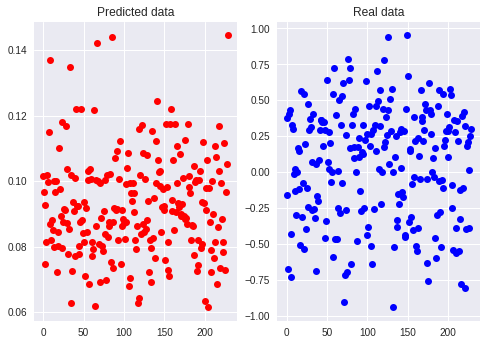

In [0]:
plt.subplot(1,2,1)
plt.plot(y_svr_pred,'ro')
plt.title("Predicted data")

plt.subplot(1,2,2)
plt.plot(y_test,'bo')
plt.title("Real data")